#### Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Load data

In [2]:
df = pd.read_csv("Loan_Modelling.csv")

#### Explore dataset

In [3]:
# check first 5 rows

df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# check dimension of data

df.shape

(5000, 14)

In [5]:
# check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

#### Visualize data

In [20]:
from utils import labeled_barplots

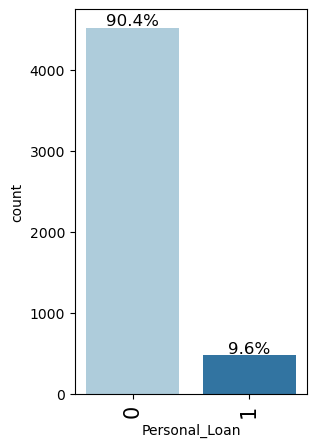

In [22]:
labeled_barplots(data=df, feature='Personal_Loan', perc=True)

The target is highly imbalanced, with 9.6% in the positive class i.e customers who accepted the loan and 90.4% in the negaitve class (those who declined the personal loan). This imbalance might impact the performance of our classification model and would need to be addressed at some point to get the best result from the models.

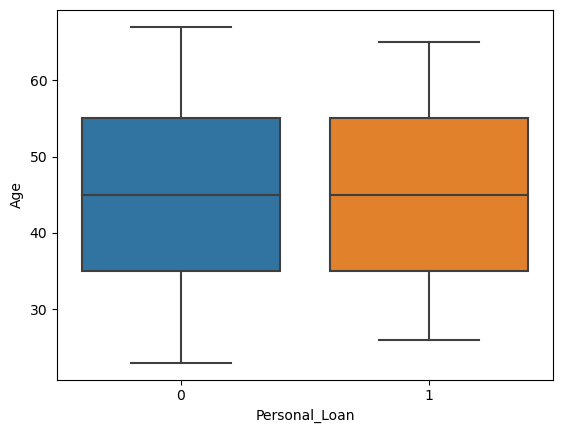

In [31]:
sns.boxplot(data = df, x = 'Personal_Loan', y = 'Age');

50% of customers that subscribed to the loan are between 35 and 55 years. Half of the customers that subscribed to the personal loan are younger than 45 years while the other half are older than 45 years old.

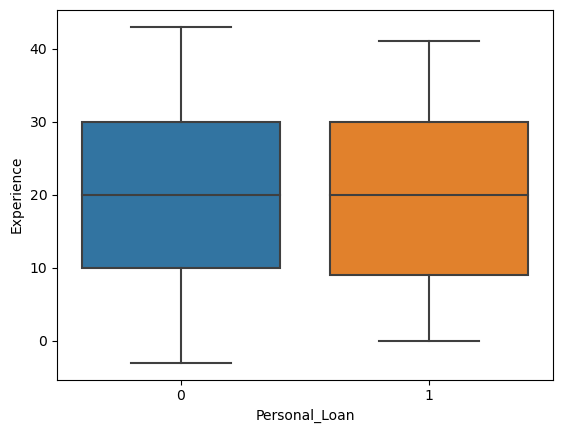

In [32]:
sns.boxplot(data = df, x = 'Personal_Loan', y = 'Experience');

50% of customers that subscribed to the loan have between 10 and 30 years of experience. Half of the customers that subscribed to the personal loan have 20 years of Experience, while the other half have more than 20 years of experience.

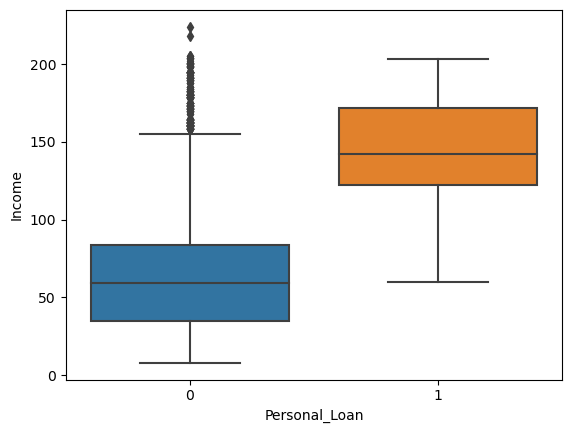

In [33]:
sns.boxplot(data = df, x = 'Personal_Loan', y = 'Income');

50% of customers that subscribed to the loan earn between 120,000 dollars and close to 175,000 dollars per annum. The minimum Income per annum for those that subscribed to the loan is approximately 62,500 dollars per. Hence, the marketing campaign should be aimed at customers earning above 62,500 dollars or thereabouts.

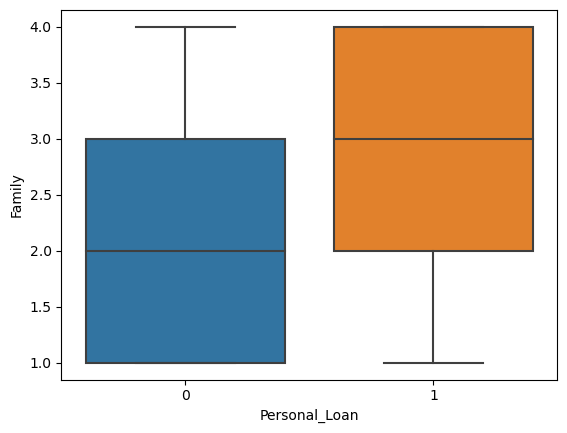

In [34]:
sns.boxplot(data = df, x = 'Personal_Loan', y = 'Family');

Focus should be on customers who have at least 3 kids with them accounting for 50% of those that subscribed for the loan while 75% of those who subscribed to the loan also have at least 2 kids.

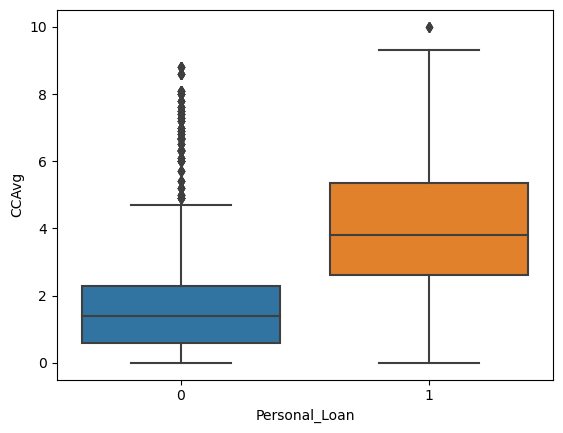

In [35]:
sns.boxplot(data = df, x = 'Personal_Loan', y = 'CCAvg');

Half of those that subscribed for the loan spend between $2,600 and just over $5,000 on credit card monthly.

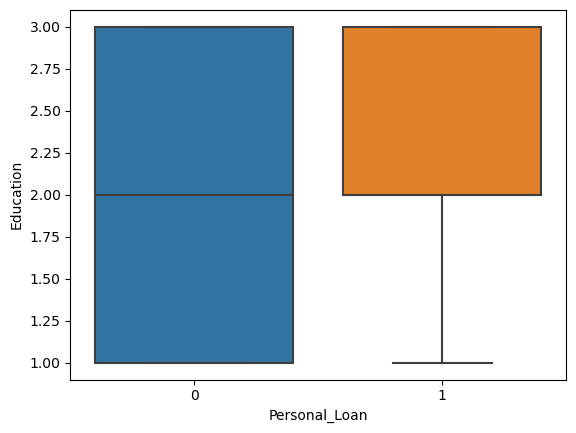

In [36]:
sns.boxplot(data = df, x = 'Personal_Loan', y = 'Education');

Focus should be on those that an Undergraduate degree and above because that group accounts for 50% of those that subscribed to the loan.

#### Investigate Correlation in data

In [46]:
# check duplicate

df.duplicated().sum()

0

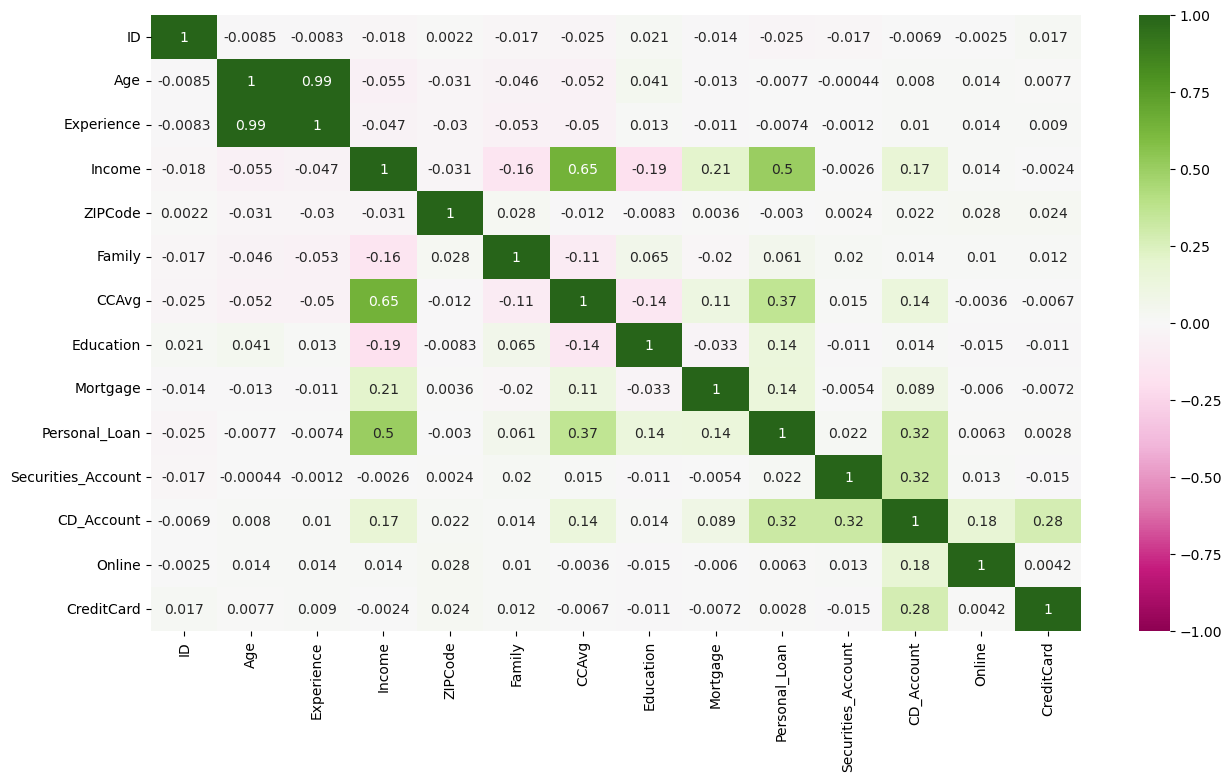

In [47]:
# check correlation

matrix_cor = df.corr()

plt.figure(figsize=(15, 8))

sns.heatmap(data=matrix_cor, vmin=-1, vmax=1, annot=True, cmap='PiYG')

plt.show()

Income appears to be the most correlated feature with Personal_Loan (0.5), followed by the average spending on credit cards per month CCAvg with a correlation of 0.37. CD_Account, which specifies whether or not the person has a certificate of deposit from another Bank also has a correlation of 0.32 with the target.

A couple of multicollinearites between features can be noticed, with the most noticable being correlation between Age and Experience at 0.99 (almost a perfect correlation). Another strong mulitcollinearity is noticed between Income and CCAvg (0.65).

In [49]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [50]:
df['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

The Experience feature contains negative values which are inconsistent with what is expected for the number of years worked. It may be due to data entry error hence I'll be replacing the three negative values (-1, -2, -3) with the median of the column.

In [51]:
df['Experience'] = df['Experience'].replace([-1, -2, -3], df['Experience'].median())

#### Select features and target

In [52]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [53]:
X = df.drop('Personal_Loan', axis = 1)
y = df['Personal_Loan']

#### Split the dataset

In [54]:
df['Personal_Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [55]:
# import needed package
from sklearn.model_selection import train_test_split

x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=0, stratify=y_temp)

#### Logistic Regression Model

In [56]:
# import required package
from sklearn.preprocessing import MinMaxScaler

#### Normalize data

In [57]:
# instantiate scaler
scaler = MinMaxScaler()

x_train_sd = scaler.fit_transform(x_train)
x_val_sd = scaler.transform(x_val)

#### Build Model

In [58]:
# import required package
from sklearn.linear_model import LogisticRegression

In [103]:
log_reg = LogisticRegression(random_state=0)

log_reg.fit(x_train_sd, y_train)

LogisticRegression(random_state=0)

#### Evaluate Model Performance

In [104]:
# import needed package
from utils import model_performance_classification

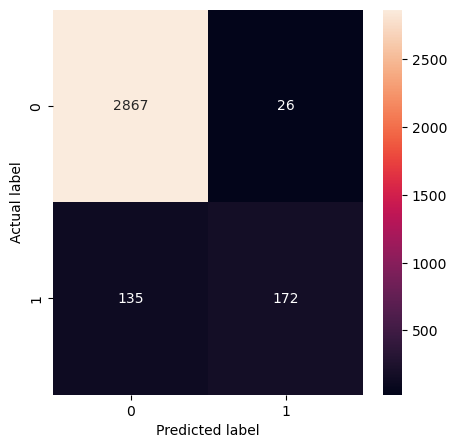

,Accuracy,Recall,Precision,F1-score
0,0.949688,0.560261,0.868687,0.681188


In [105]:
# performance on train data
log_reg_train = model_performance_classification(log_reg, x_train_sd, y_train)

log_reg_train

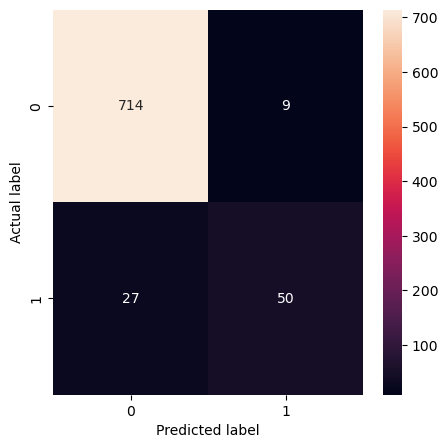

,Accuracy,Recall,Precision,F1-score
0,0.955,0.649351,0.847458,0.735294


In [106]:
# evaluate performance on validation data
log_reg_val = model_performance_classification(log_reg, x_val_sd, y_val)

log_reg_val

Of the 77 customers who subscribed to the Personal Loan offered (in the validation data from the previous campaign), the model was only able to correctly predict 50 of them correctly representing 64.9% success (Recall). The model wrongly predicted that 27 customers who actually subscribed to the personal loan will not subscribe to the loan. 

The implication of this is that the Bank will lose out on a potential 35% business if this model were to be deployed and applied to new customer data from the bank.

Out of the customers the model predicted will subscribe to the personal loan (77), it got approximatly 35% (27) of those predictions correctly.

#### Model Improvement

#### Tweak the threshold to improve Recall performance

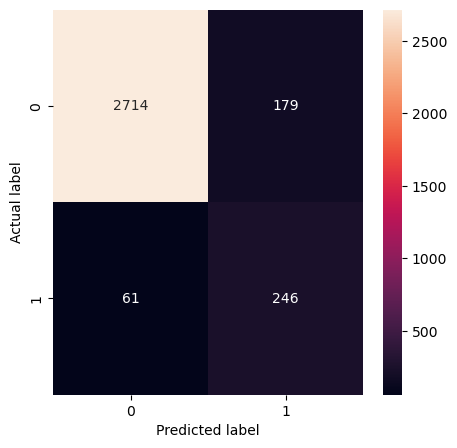

,Accuracy,Recall,Precision,F1-score
0,0.925,0.801303,0.578824,0.672131


In [107]:
# reduce threshold to improve Recall 
log_reg_train_2 = model_performance_classification(log_reg, x_train_sd, y_train, threshold=0.2)

log_reg_train_2

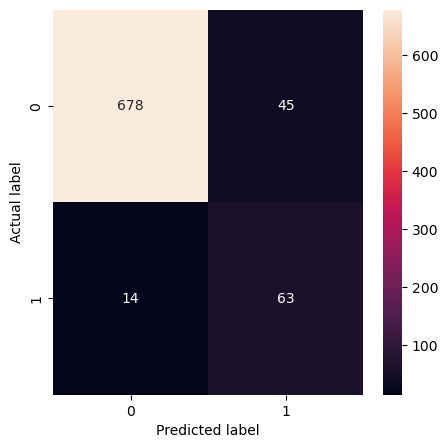

,Accuracy,Recall,Precision,F1-score
0,0.92625,0.818182,0.583333,0.681081


In [130]:
# evaluate model performance on validation set
log_reg_val_2 = model_performance_classification(log_reg, x_val_sd, y_val, threshold=0.2)

log_reg_val_2

The Recall performance has improved to 81.8%, which is significant because the positive class i.e those that will subscribe to the personal loan is the most important class to the Bank. Hence, the relevant metric we are interested in maximising is the Recall performance.

The higher we are able to get on the Recall performance, the lesser the mistake the model makes in wrongly predicting that customers who we know will subscribe to the personal loan from the original data will not subscribe to it (False Negative class).

#### Balance the imbalance data with SMOTE

In [108]:
# import needed package
from imblearn.over_sampling import SMOTE

In [109]:
# instantiate SMOTE oversampler
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)

In [110]:
# split the balanced data into test, validation, and test

x_temp_sm, x_test_sm, y_temp_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)

x_train_sm, x_val_sm, y_train_sm, y_val_sm = train_test_split(x_temp_sm, y_temp_sm, test_size=0.2, random_state=0)

In [111]:
# normalize the balanced data
scaler = MinMaxScaler()

x_train_sm_sd = scaler.fit_transform(x_train_sm)
x_val_sm_sd = scaler.transform(x_val_sm)

#### Rebuild the logistic regression model with the balanced data

In [116]:
log_reg_sm = LogisticRegression(random_state=0, class_weight = {0:0.1, 1:0.9})

log_reg_sm.fit(x_train_sm_sd, y_train_sm)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, random_state=0)

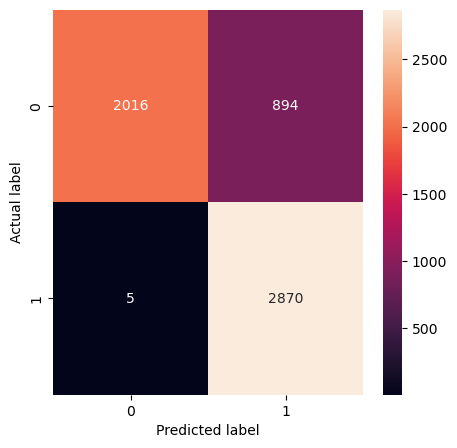

,Accuracy,Recall,Precision,F1-score
0,0.844598,0.998261,0.762487,0.864588


In [117]:
# evaluate model performance on train data

log_reg_sm_train = model_performance_classification(log_reg_sm, x_train_sm_sd, y_train_sm)

log_reg_sm_train

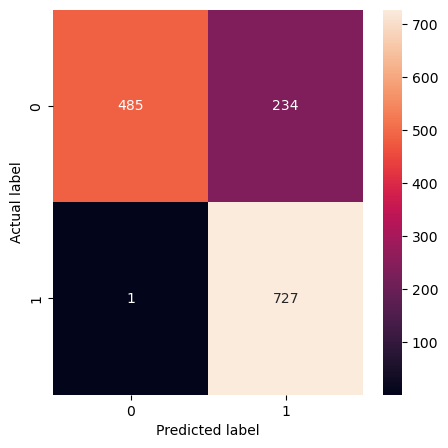

,Accuracy,Recall,Precision,F1-score
0,0.837595,0.998626,0.756504,0.860864


In [118]:
# evaluate model performance on validation data

log_reg_sm_val = model_performance_classification(log_reg_sm, x_val_sm_sd, y_val_sm)

log_reg_sm_val

This Logostic regression model, built with balanced data and a class weight which tells the algorithm to focus on the positive class (those that subscribed to the personal loan in the previous campaign i.e in the data) gives the best Recall performance of 99.8% and generalizes well.

#### Decision Tree Model

In [71]:
# import needed package
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [72]:
# instantiate the decision tree classifier
dec_tree = DecisionTreeClassifier(random_state=0)

# train the model
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

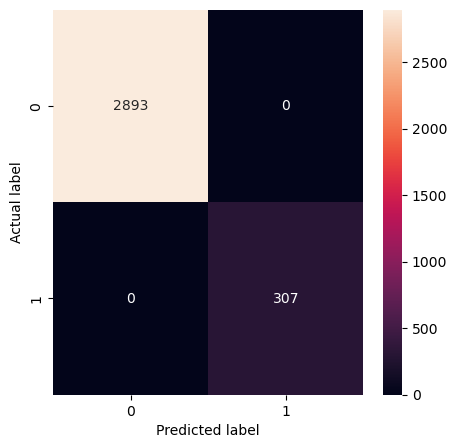

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [73]:
# evaluate performance on train data

dec_tree_train = model_performance_classification(dec_tree, x_train, y_train)

dec_tree_train

The decision tree model gives a 100% performance on the training data.

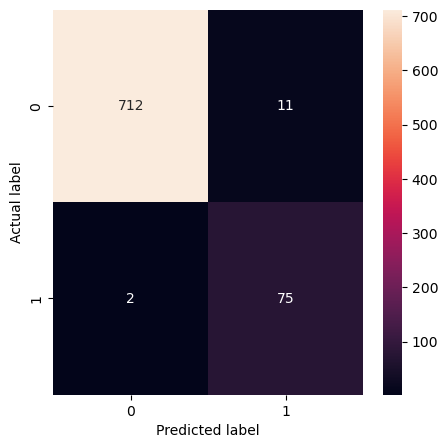

,Accuracy,Recall,Precision,F1-score
0,0.98375,0.974026,0.872093,0.920245


In [74]:
# evaluate performance on validation data

dec_tree_val = model_performance_classification(dec_tree, x_val, y_val)

dec_tree_val

The model overfits, with lower performance on the validation data compared to the training data. Nothing short of a 100% (or extremely close) is expected from a supposedly 'perfect' model going by the performance on the training data.

#### Model Improvement(Use a class weight focusing on the minority class)

In [75]:
# instantiate the decision tree classifier
dec_tree_2 = DecisionTreeClassifier(random_state=0, class_weight={0:0.1, 1:0.9})

# train the model
dec_tree_2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=0)

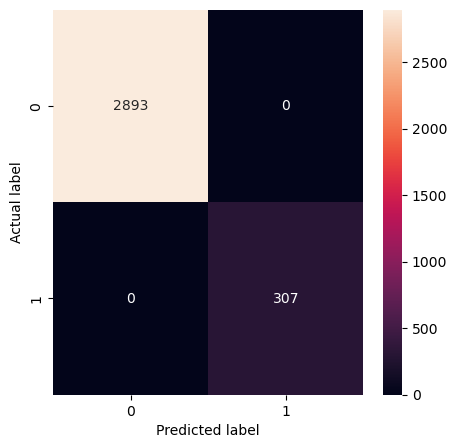

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [76]:
# evaluate performance on train data

dec_tree_2_train = model_performance_classification(dec_tree_2, x_train, y_train)

dec_tree_2_train

Model performance with a class weight focusing on the minority class is still 100%, suggesting the model will probably still overfit.

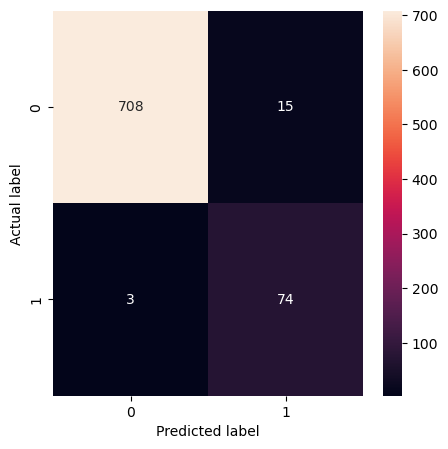

,Accuracy,Recall,Precision,F1-score
0,0.9775,0.961039,0.831461,0.891566


In [77]:
# evaluate performance on validation data

dec_tree_2_val = model_performance_classification(dec_tree_2, x_val, y_val)

dec_tree_2_val

Performance is poorer on the validation data, hence model still overfits.

#### Building the model with a balanced data

In [78]:
# train, validation, and test data after balancing from SMOTE from the Logistic Regression Model

x_temp_tree, x_test_tree, y_temp_tree, y_test_tree = train_test_split(X_sm, y_sm, 
                                                                test_size=0.2, random_state=0)

x_train_tree, x_val_tree, y_train_tree, y_val_tree = train_test_split(x_temp_tree, 
                                                                y_temp_tree, test_size=0.2, random_state=0)

In [79]:
from collections import Counter

In [80]:
Counter(y_sm)

Counter({0: 4520, 1: 4520})

#### Rebuild the Decison Tree model with the balanced data

In [81]:
# instantiate the decision tree classifier
dec_tree_3 = DecisionTreeClassifier(random_state=0)

# train the model
dec_tree_3.fit(x_train_tree, y_train_tree)

DecisionTreeClassifier(random_state=0)

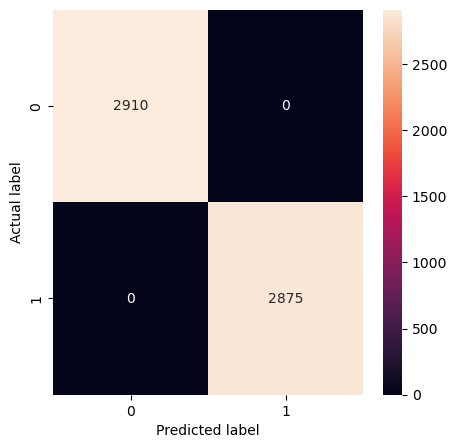

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [82]:
# evaluate model performance on training data

dec_tree_3_train = model_performance_classification(dec_tree_3, x_train_tree, y_train_tree)

dec_tree_3_train

Decision Tree model still produces a 100% performance on training data with balanced data.

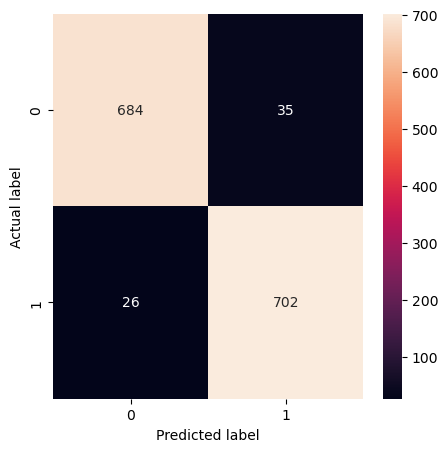

,Accuracy,Recall,Precision,F1-score
0,0.957844,0.964286,0.95251,0.958362


In [83]:
# evaluate model performance on validation data

dec_tree_3_val = model_performance_classification(dec_tree_3, x_val_tree, y_val_tree)

dec_tree_3_val

The model still overfits with poor performance on the validation data. Hence, balancing the data didn't improve the performance of Decision Tree on this data.

#### Applying Pre-pruning to limit the depth of the tree and prevent overfitting

In [84]:
# instantiate the decision tree classifier
dec_tree_4 = DecisionTreeClassifier(random_state=0, max_depth=3) # this limits the depth of tree formed to 3

# train the model
dec_tree_4.fit(x_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=3, random_state=0)

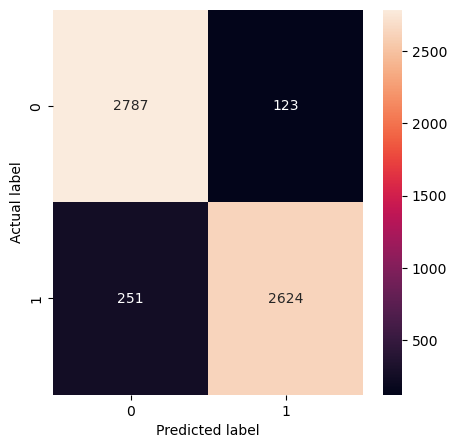

,Accuracy,Recall,Precision,F1-score
0,0.93535,0.912696,0.955224,0.933476


In [85]:
# evaluate model performance on training data

dec_tree_4_train = model_performance_classification(dec_tree_4, x_train_tree, y_train_tree)

dec_tree_4_train

Model no longer overfits, with a Recall performance of 90.4%.

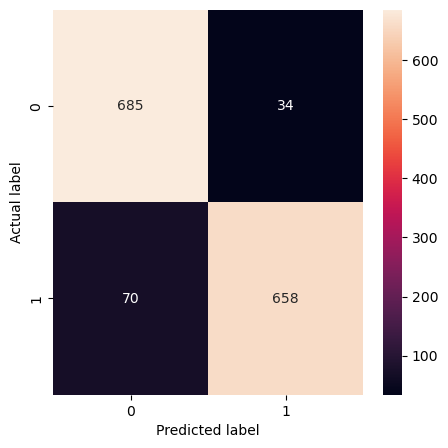

,Accuracy,Recall,Precision,F1-score
0,0.928127,0.903846,0.950867,0.926761


In [86]:
# evaluate model performance on validation data

dec_tree_4_val = model_performance_classification(dec_tree_4, x_val_tree, y_val_tree)

dec_tree_4_val

#### Visualize/Draw the Decision Tree Model

In [87]:
# pip install pydotplus

In [88]:
import pydotplus
from IPython.display import Image

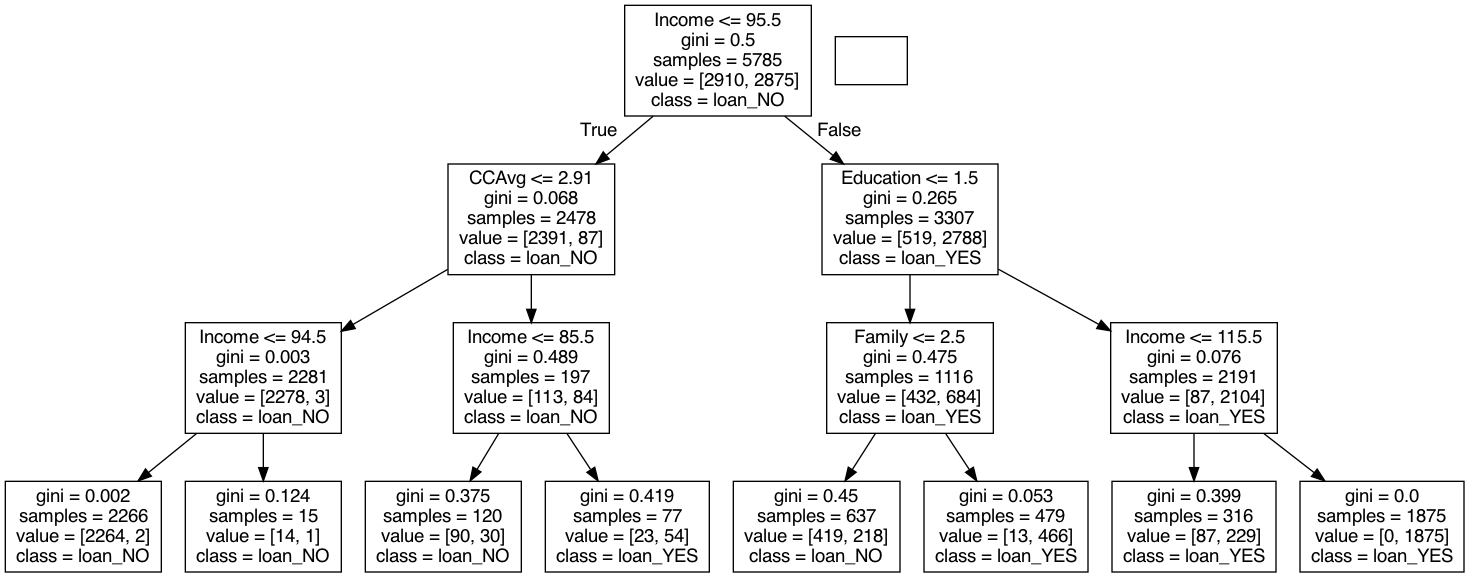

In [89]:
dot_data = tree.export_graphviz(dec_tree_4, out_file=None, feature_names=X.columns, 
                                class_names=['loan_NO', 'loan_YES'])

# create graph from dot data
graph = pydotplus.graph_from_dot_data(dot_data)

#create tree image from graph
Image(graph.create_png())


# dot_data = tree.export_graphviz(clf3, out_file = None, feature_names = X.columns,
#                                class_names=["0","1"])

# # create a graph from the dot data
# graph = pydotplus.graph_from_dot_data(dot_data)

# # create the tree image from the graph
# Image(graph.create_png())

#### Visualize Feature Importances

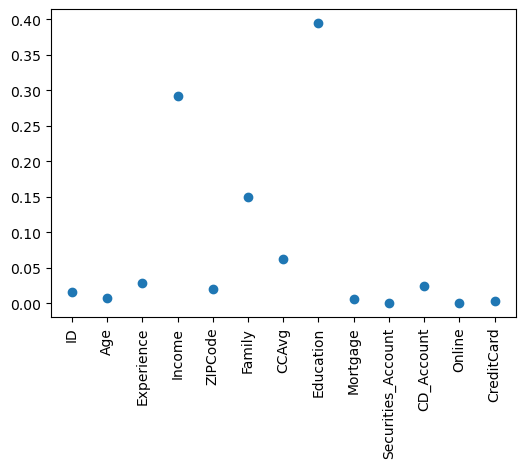

In [90]:
plt.figure(figsize=(6, 4))
plt.plot(dec_tree.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

The feature importances plot show that the most important features which predicts whether a customer will subscribe to the personal loan are: Education, Income, Family, and CCAvg.

It appears that customers with Graduate degrees and Advanced/Professional education are more likely to subscribe to the personal loan as showed in the Decision tree drawing.

Also, customers with annual higher than 83,500 are more likely to subscribe to the personal loan offered by the bank. Customers with a family size of 3 and above are also likely to subscribe to the personal loan.

Lastly, customers with average credit card spending higher than 3,000 are more likely to subscribe to the personal loan.

#### Random Forest Model

In [91]:
# import the needed packages
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [92]:
# instantiate the model
rand_forest = RandomForestClassifier(random_state=0)

# train model
rand_forest.fit(x_train_sm, y_train_sm)

RandomForestClassifier(random_state=0)

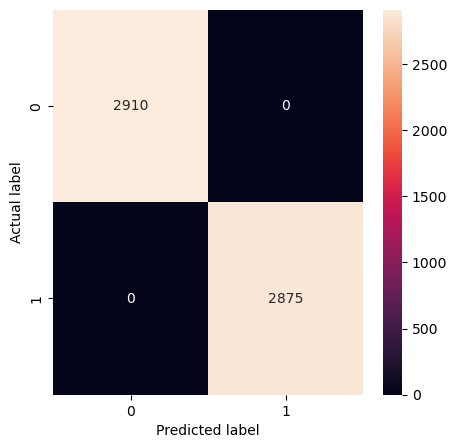

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [93]:
# evaluate performance on training data

rand_forest_train = model_performance_classification(rand_forest, x_train_sm, y_train_sm)

rand_forest_train

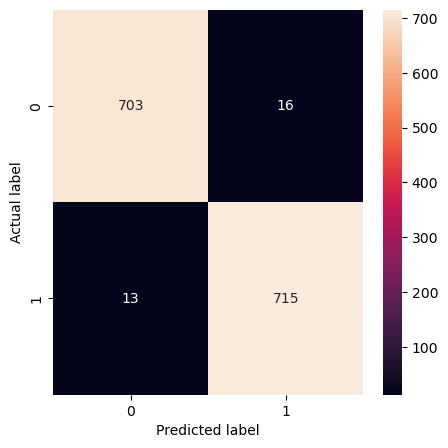

,Accuracy,Recall,Precision,F1-score
0,0.979959,0.982143,0.978112,0.980123


In [94]:
# evaluate performance on validation data

rand_forest_val = model_performance_classification(rand_forest, x_val_sm, y_val_sm)

rand_forest_val

Random Forest overfits too.

#### Pre-pruning by applying a max depth of 4

In [95]:
# instantiate the model
rand_forest_2 = RandomForestClassifier(random_state=0, max_depth=4)

# train model
rand_forest_2.fit(x_train_sm, y_train_sm)

RandomForestClassifier(max_depth=4, random_state=0)

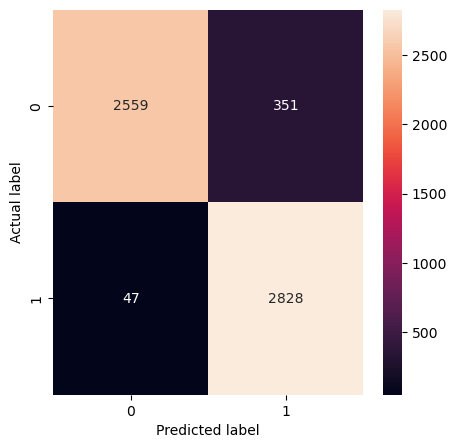

,Accuracy,Recall,Precision,F1-score
0,0.931201,0.983652,0.889588,0.934258


In [96]:
# evaluate performance on training data

rand_forest_2_train = model_performance_classification(rand_forest_2, x_train_sm, y_train_sm)

rand_forest_2_train

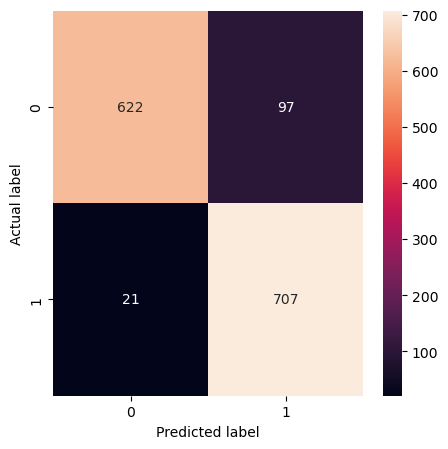

,Accuracy,Recall,Precision,F1-score
0,0.918452,0.971154,0.879353,0.922977


In [97]:
# evaluate performance on validation data

rand_forest_2_val = model_performance_classification(rand_forest_2, x_val_sm, y_val_sm)

rand_forest_2_val

This model generalizes with a Recall of 99% on validation data. This performance implies that the model was able to predict correctly 99.3% of the time, customer who will take the personal loan in the actual data.

For example, the validation data consists of 728 customers that subscribed to the personal loan offered by the bank. This Random forest model was able to correctly predict 723 of the 728, representing a recall score of 99.3%. This is a reliable model which will help the Bank concentrate on the right customers to target for the campaign and help increase their profit on interest from the customers going forward.

#### Visualizing feature Importances for the Random Forest Model

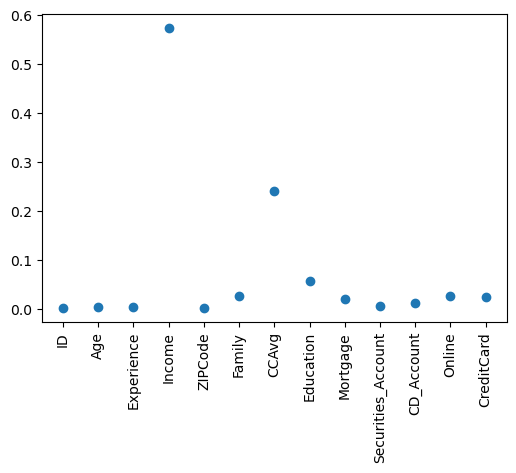

In [98]:
plt.figure(figsize=(6, 4))
plt.plot(rand_forest_2.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

The feature importances plot for the Random Forest Model shows that the most important features in predicting whether a customer will subscribe to the personal loan offered by the Bank are Income and CCAvg, with Education, CreditCard, Online, and Family deemed to have some level of importances but not pronouced.

For this model, the yearly income of the customer and the monthly Credit Card spending are the most important features to predict whether or not a customer will subscribe to the personal loan.

#### Gradient Boosting Model

In [99]:
# instantiate the model
grad_boost = GradientBoostingClassifier(random_state=0)

# train model
grad_boost.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(random_state=0)

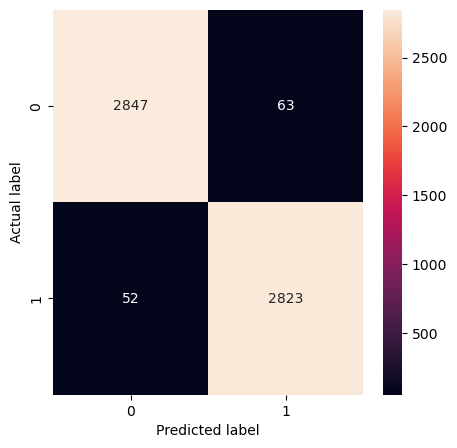

,Accuracy,Recall,Precision,F1-score
0,0.980121,0.981913,0.97817,0.980038


In [100]:
# evaluate performance on training data

grad_boost_train = model_performance_classification(grad_boost, x_train_sm, y_train_sm)

grad_boost_train

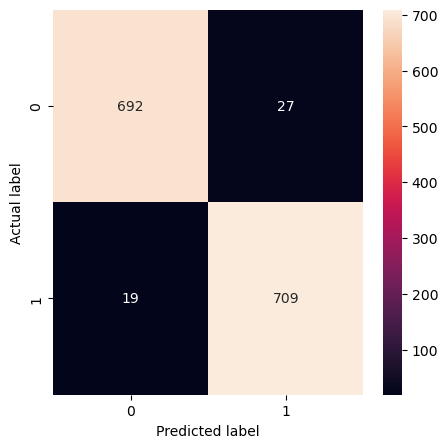

,Accuracy,Recall,Precision,F1-score
0,0.96821,0.973901,0.963315,0.968579


In [101]:
# evaluate performance on validation data

grad_boost_val = model_performance_classification(grad_boost, x_val_sm, y_val_sm)

grad_boost_val

#### Visualizing feature Importances for Gradient Boosting

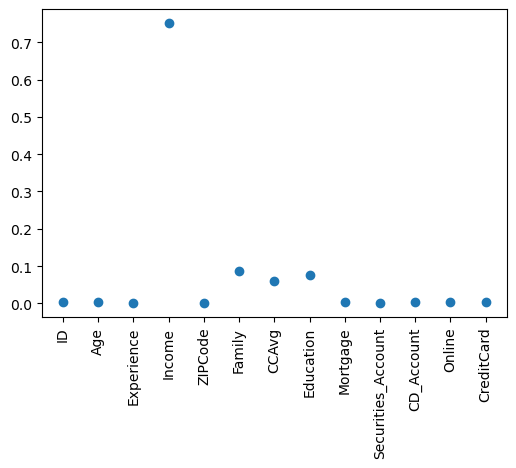

In [102]:
plt.figure(figsize=(6, 4))
plt.plot(grad_boost.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

According to Gradient Boosting, the single most important feature that predicts customers that will take the personal loan is Income. Family, CCAvg, and Education come somewhat joint-second as they have approximate importances.

#### Model Impreovement by using GridSearch as a hyperparamter tuning method

In [123]:
# import the grid search model and estimator
from sklearn.model_selection import GridSearchCV

# set the parameters to tune
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1, 10], 'max_depth': list(range(1, 5))}

# instantiate the models
grad_boost_2 = GradientBoostingClassifier(random_state=0)

grid = GridSearchCV(grad_boost_2, param_grid, cv = 5, n_jobs = -1, scoring = "recall")

# fit the grid search model on the training set
grid.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 2, 3, 4]},
             scoring='recall')

In [124]:
# get the best parameters

best_params = grid.best_params_
best_params

{'learning_rate': 0.01, 'max_depth': 2}

In [125]:
# get the scorer

grid.scorer_

make_scorer(recall_score, average=binary)

In [126]:
# get the best score

grid.best_score_

0.9892173913043477

#### Rebuild the model with the hyperparameters suggested by GridSearch

In [127]:
# instantiate the model
grad_boost_3 = GradientBoostingClassifier(**best_params, random_state=0)

# train model
grad_boost_3.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=0)

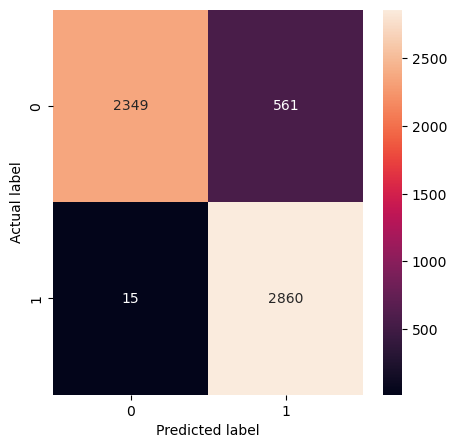

,Accuracy,Recall,Precision,F1-score
0,0.900432,0.994783,0.836013,0.908513


In [128]:
# evaluate performance on training data

grad_boost_3_train = model_performance_classification(grad_boost_3, x_train_sm, y_train_sm)

grad_boost_3_train

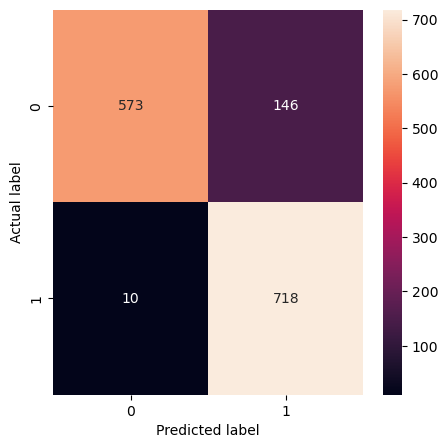

,Accuracy,Recall,Precision,F1-score
0,0.892191,0.986264,0.831019,0.90201


In [129]:
# evaluate performance on validation data

grad_boost_3_val = model_performance_classification(grad_boost_3, x_val_sm, y_val_sm)

grad_boost_3_val

The model generalizes with a recall performance of 98.6% on the validation set, which is better than the Recall performance obtained on the same validation set and model with default parameters (96.3%).

Thus, hyperparameter tuning using GridSearch improved the performance of the Gradient Boosting Model.

Of the 728 customers in the validation data that subscribed to the Bank's loan in the previous campaign(original data), the model was able to predict 718 of them correctly. This model can help the Bank predict customers that will subscribe to the loan, with approximately 1.4% of making a wornd prediction.

#### Comparing the Decision Tree model with Logistic Regression

The Decision Tree model generally overfits for this data, the best performance that didn't overfit was 90% on the Recall. The Logistic Regression model generalizes and produced a 99% Recall performance hence is recommended and will do a better job in predicting customers who will subscribe to the loan and help the Marketing department focus on customers with the right profile.

#### Parting Recommendation

Among other insights that have been produced earlier on, my recommendation is that the Bank should focus their campaign on customers with higher Income (62,500 dollars/year), customers with at least a graduate degree and above, customers with at least 2 children because these group of customers are more likely to subscribe the personal loan.